# Configuration

In [1]:
# Parameters
PROJECT_NAME = 'ML1010-Group-Project'
ENABLE_COLAB = True

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni/Documents/ML_Projects'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Mounted at /content/gdrive
Wha...where am I?
I am awake now.

I have set your current working directory to /content/gdrive/MyDrive/Colab Notebooks/ML1010-Group-Project
The current time is 19:03
Hello sir. I hope you had dinner.



# Setup Runtime Environment

In [43]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install https://github.com/pandas-dev/pandas.git
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

nltk.download('stopwords')
%matplotlib inline

     - 308 kB 4.5 MB/s
  ERROR: Cannot unpack file /tmp/pip-unpack-la251zv3/pandas.git (downloaded from /tmp/pip-req-build-f15hgqq6, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-f15hgqq6


'Google Colab enabled'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data - Review Details

In [4]:
jarvis.getPackageVersion('pandas')
!python -V

pandas version: pandas 1.1.5
Python 3.7.12


In [5]:
jarvis.showProjectDataFiles()
data = pd.read_pickle(jarvis.DATA_DIR + "/02_working/04_NLP_ReviewText_Narrow.pkl")

mvutils.exploreDataframe (data)

Here are all your project data files
[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project
----->** No files **

[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/01_original
---[   gz][ json]--> Cell_Phones_and_Accessories_5.json.gz (161.24 MB)
---[   gz][ json]--> meta_Cell_Phones_and_Accessories.json.gz (343.33 MB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/ML1010-Group-Project/02_working
[*][  pkl]---------> 02_Cellphone.pkl (46.32 MB)
[*][  pkl]---------> 02_NLP_ReviewTextData.pkl (87.00 MB)
[*][  pkl]---------> 02_NLP_SummaryData.pkl (8.32 MB)
[*][  pkl]---------> 02_NLP_TitleData.pkl (16.71 MB)
[*][  pkl]---------> 03_Cellphone.pkl (46.31 MB)
[*][  pkl]---------> 03_NLP_ReviewTextData.pkl (28.94 MB)
[*][  pkl]---------> 03_NLP_ReviewText_Narrow.pkl (17.13 MB)
[*][  pkl]---------> 03_NLP_SummaryData.pkl (3.82 MB)
[*][  pkl]---------> 03_NLP_TitleData.pkl (2.73 MB)
[*][  pkl]---------> 04_NLP_ReviewText_Narrow.pkl (16.95 MB)

[D] /content

None


Top 5 in dataframe


,uuid,overall,reviewText_lemma,reviewText_lemma_bert,reviewText_lemma_flairSent,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj
0,34397c8e-912d-4f45-b53d-8271d4799df2,1.0,phone ugly heavy terrible user interface techi...,"[0.472575, 1.1316764, 0.47724408, 0.40457952, ...",-0.999978,-0.435714,0.785714
1,96060090-a5d8-42e3-b7a4-8a51f2a17b64,1.0,phone ugly heavy terrible user interface techi...,"[0.472575, 1.1316764, 0.47724408, 0.40457952, ...",-0.999978,-0.435714,0.785714
2,b507b5d0-4ebd-4058-8a23-ebff7c8e7e4c,4.0,Samsung V205 decide try e715 . fyi people batt...,"[0.5943448, 1.120459, 1.3083879, 0.2905336, 0....",0.996740,0.142870,0.504815
3,ffd84d42-6d8b-4987-b4b6-8b45bba57f53,4.0,Samsung V205 decide try e715 . fyi people batt...,"[0.5943448, 1.120459, 1.3083879, 0.2905336, 0....",0.996740,0.142870,0.504815
4,08fc7ee0-2cb3-494f-ba05-883313df4947,3.0,Samsung phone measure - V300 . TMobile custo...,"[0.05153645, 1.3784496, 1.3119371, 0.37493548,...",-0.999445,0.101871,0.593651



Bottom 5 in dataframe


,uuid,overall,reviewText_lemma,reviewText_lemma_bert,reviewText_lemma_flairSent,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj
4995,a49a6e76-06e8-465f-9fb0-7e95d3eb1bb3,2.0,good,"[1.3252409, -0.005892774, 1.6287613, 0.6609611...",0.931395,0.700000,0.60000
4996,441abe0e-d1a3-48b5-8404-97176bf651f1,1.0,work,"[1.462916, 0.46006256, 1.5417645, 0.4423654, -...",0.979813,0.000000,0.00000
4997,bb162c3f-795d-456f-86ca-f61af1c7321c,1.0,wow believe sell garbage phone come 2011 terri...,"[0.46037146, 0.8567197, 0.72828, 0.33222312, 0...",-0.999920,-0.290909,0.77197
4998,72734bcd-9f09-4a94-b9bd-f2238eb819e1,4.0,great starter android phone .,"[0.32569677, 0.69061035, 0.37134176, 0.1999133...",0.995356,0.800000,0.75000
4999,1ccb0c05-1095-40f7-888b-3b3f80ee5f3b,5.0,"give son gift , love .","[1.023189, 1.0180414, 1.7816166, 0.59004945, 0...",0.988968,0.500000,0.60000


In [6]:
data_core = data
sentences = data_core['reviewText_lemma'].to_list()
print("Sample sentence \n", sentences[5])

Sample sentence 
 Samsung phone measure - V300 .   TMobile customer finally feed V300 terrible camera , TMobile send " upgrade " . 
 good feature phone : 
 1)it external antenna brake 
 2)the camera take well picture V300 
 3)it small comfortable use 
 bad thing phone : 
 1)the sound quality receiver tinny sound ' digital ' ( unlike v300 realize good receive phone ) 
 2)it lack feature ! ( maybe spoil v300 phone ' technology ' phone .   example- phone easy use datebook set alarm remind appointments- speakerphone work v300 handy times- simply , like Commodore 64 computer world 3ghz processor . ) 
 3)lastly , simply ' smart ' phone v300 . word , easy use , feature pack , " practically design " . 
 modern cell phone , opinion , need flashy work art look , accomodate user easy use practical feature , sadly , phone fall short . 
 debate phone v300- V300 upgrade phone way camera .


# BERT Sentiment Analysis

In [7]:
import tensorflow as tf
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
print('Num GPUs available: ' , num_gpus_available)
assert num_gpus_available > 0

Num GPUs available:  1


In [8]:
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

In [12]:
data_sent = data.copy()

In [15]:
data_sent['overall'] = pd.to_numeric(data_sent['overall'])

Beginning analysis on 'Main' frame......
Analysis column: overall
Distinct values (incl. null): 5
Number of null values: 0
Total documents in corpus: 5000

Top 20 for summary of column overall


,order,overall,docCount,cumulativeCount,percTotal,percCumulative
1,1,5.0,2659,2659,0.53,0.53
2,2,4.0,919,3578,0.18,0.72
3,3,1.0,589,4167,0.12,0.83
4,4,3.0,527,4694,0.11,0.94
5,5,2.0,306,5000,0.06,1.00




Last 20 for summary of column overall


,order,overall,docCount,cumulativeCount,percTotal,percCumulative
1,1,5.0,2659,2659,0.53,0.53
2,2,4.0,919,3578,0.18,0.72
3,3,1.0,589,4167,0.12,0.83
4,4,3.0,527,4694,0.11,0.94
5,5,2.0,306,5000,0.06,1.00




Lineplot showing overall distribution


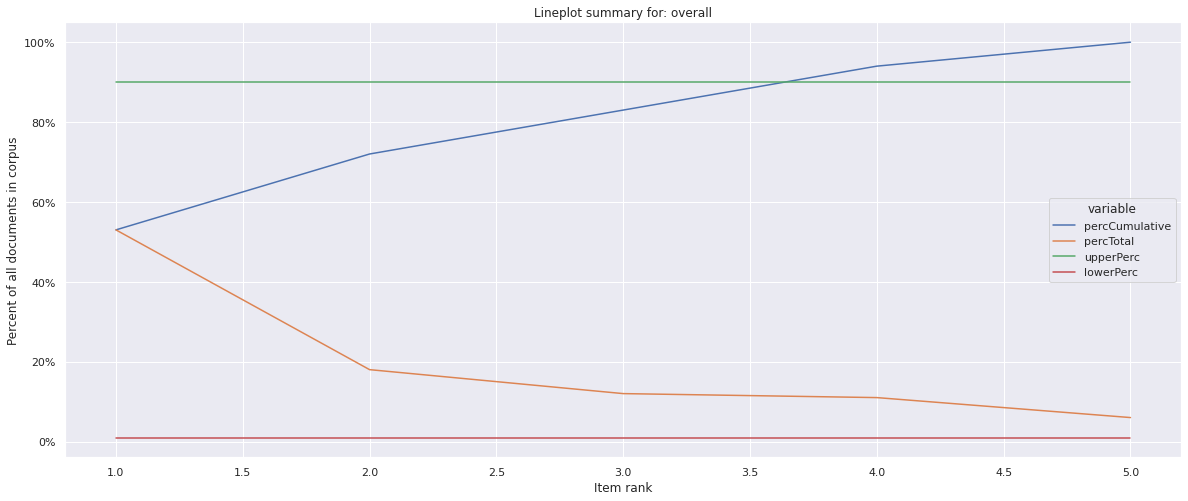




Barplot showing overall distribution


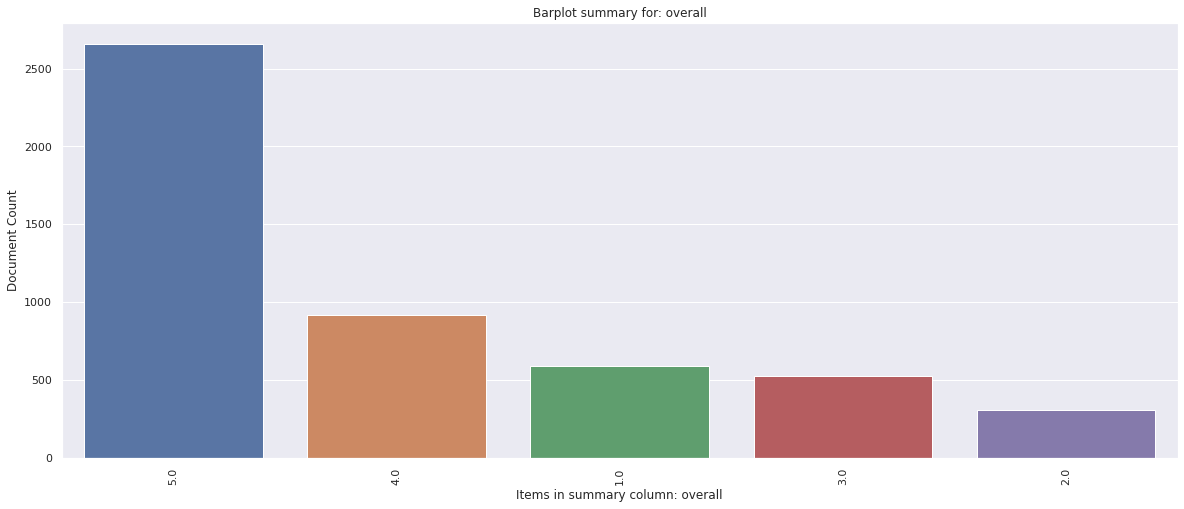




Beginning analysis on 'Focused' frame......
Analysis column: overall
Distinct values (incl. null): 3
Number of null values: 0
Total documents in corpus: 4167

Top 20 for summary of column overall


,order,overall,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,5.0,2659,2659,0.53,0.53,0.9,0.01,1,1
2,2,4.0,919,3578,0.18,0.72,0.9,0.01,1,1
3,3,1.0,589,4167,0.12,0.83,0.9,0.01,1,1




Last 20 for summary of column overall


,order,overall,docCount,cumulativeCount,percTotal,percCumulative,upperPerc,lowerPerc,upperInclude,lowerInclude
1,1,5.0,2659,2659,0.53,0.53,0.9,0.01,1,1
2,2,4.0,919,3578,0.18,0.72,0.9,0.01,1,1
3,3,1.0,589,4167,0.12,0.83,0.9,0.01,1,1




Lineplot showing overall distribution


/content/gdrive/MyDrive/Colab Notebooks/utility_files/mv_python_utils.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnDf[upperPercColName] = upperPerc
/content/gdrive/MyDrive/Colab Notebooks/utility_files/mv_python_utils.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnDf[lowerPercColName] = lowerPerc


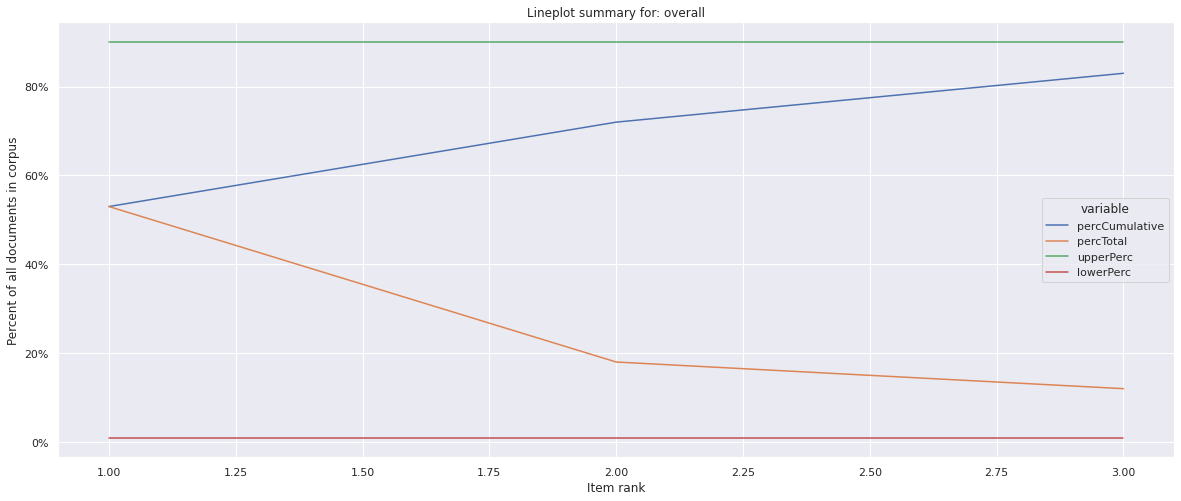




Barplot showing overall distribution


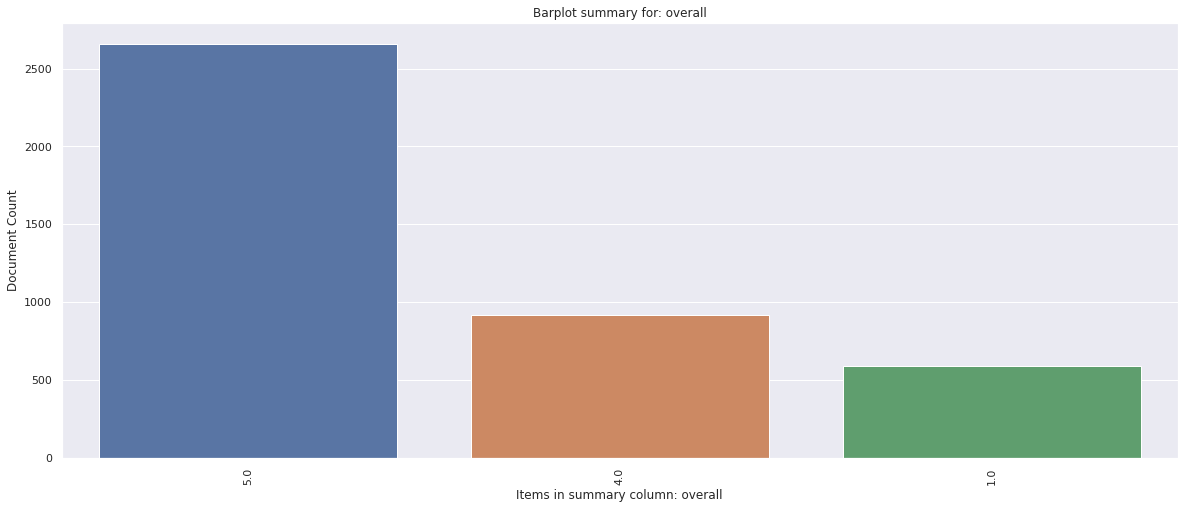

,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,overall,5000,0,5,1.0,0.00,1.00,1.0
1,Trimmed,overall,4167,0,3,0.9,0.01,0.83,0.6


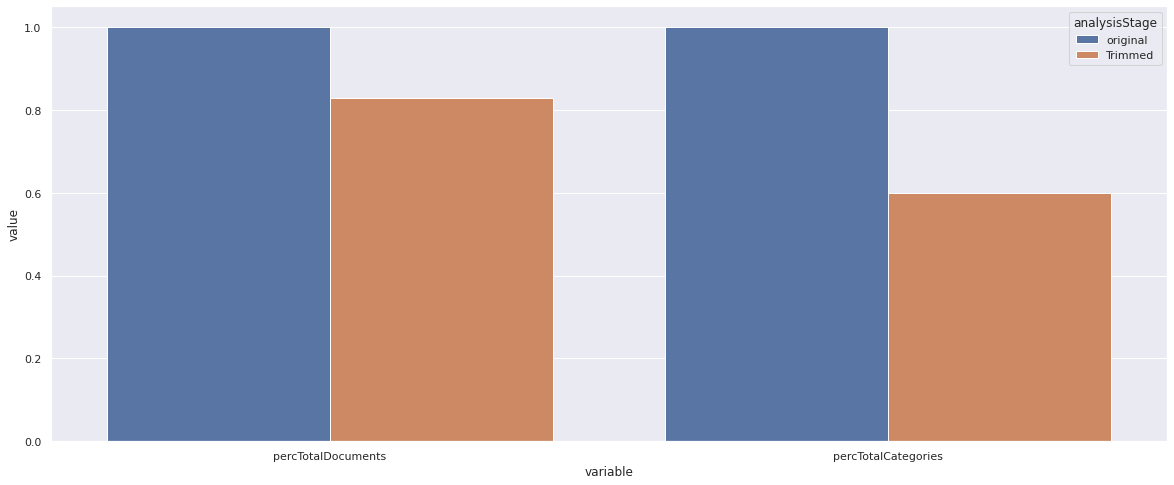

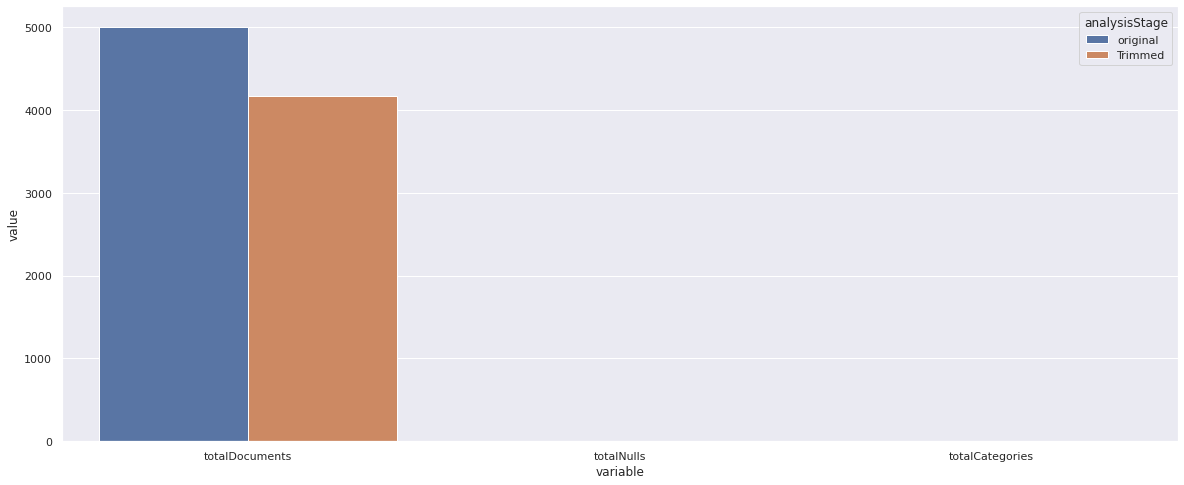

,analysisStage,columnName,totalDocuments,totalNulls,totalCategories,upperPerc,lowerPerc,percTotalDocuments,percTotalCategories
0,original,overall,5000,0,5,1.0,0.00,1.00,1.0
1,Trimmed,overall,4167,0,3,0.9,0.01,0.83,0.6


In [13]:
mvutils.columnExplore(data_sent, 'overall')

In [16]:
data_sent['Sentiment'] = data_sent['overall'].apply(lambda score: "positive" if score >=3 else "negative")
data_sent['Sentiment'] = data_sent['Sentiment'].map({'positive':1, 'negative':0})
data_sent['short_review'] = data_sent['reviewText_lemma']

In [20]:
mvutils.exploreDataframe(data_sent, numRecords=1)

dataframe shape: (5000, 9)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uuid                        5000 non-null   object 
 1   overall                     5000 non-null   float64
 2   reviewText_lemma            5000 non-null   object 
 3   reviewText_lemma_bert       5000 non-null   object 
 4   reviewText_lemma_flairSent  4992 non-null   float64
 5   reviewText_lemma_tb_pol     4992 non-null   float64
 6   reviewText_lemma_tb_subj    4992 non-null   float64
 7   Sentiment                   5000 non-null   int64  
 8   short_review                5000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


None


Top 1 in dataframe


,uuid,overall,reviewText_lemma,reviewText_lemma_bert,reviewText_lemma_flairSent,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj,Sentiment,short_review
0,34397c8e-912d-4f45-b53d-8271d4799df2,1.0,phone ugly heavy terrible user interface techi...,"[0.472575, 1.1316764, 0.47724408, 0.40457952, ...",-0.999978,-0.435714,0.785714,0,phone ugly heavy terrible user interface techi...



Bottom 1 in dataframe


,uuid,overall,reviewText_lemma,reviewText_lemma_bert,reviewText_lemma_flairSent,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj,Sentiment,short_review
4999,1ccb0c05-1095-40f7-888b-3b3f80ee5f3b,5.0,"give son gift , love .","[1.023189, 1.0180414, 1.7816166, 0.59004945, 0...",0.988968,0.5,0.6,1,"give son gift , love ."


In [21]:
reviews = data_sent_trunc['short_review'].tolist()
labels= data_sent_trunc['Sentiment'].tolist()

In [23]:
print (reviews[0])

phone ugly heavy terrible user interface techie like .   drop call like crazy Manhattan .   Moto v600 well phone , take well picture , give well clarity reception , small , , cheap .   Moto v600 want T - Mobile .   stay away ugly monster .


In [24]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=0.2)

In [25]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [26]:
print (training_sentences[0])

ship - advertise come quickly . thing , like phone . screen saver , wall paper menu limit look like child ' room ? , phone work expect , sell quickly juvenile " theme " change .


In [27]:
tokenizer ([training_sentences[0]], truncation=True, padding=True,max_length=128)


{'input_ids': [[101, 2911, 1011, 4748, 16874, 5562, 2272, 2855, 1012, 2518, 1010, 2066, 3042, 1012, 3898, 3828, 2099, 1010, 2813, 3259, 12183, 5787, 2298, 2066, 2775, 1005, 2282, 1029, 1010, 3042, 2147, 5987, 1010, 5271, 2855, 11799, 1000, 4323, 1000, 2689, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [28]:
train_encodings = tokenizer(training_sentences, truncation=True, padding=True)
val_encodings = tokenizer(validation_sentences, truncation=True, padding=True)

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), training_labels))

In [30]:
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), validation_labels))

In [31]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_projector', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-8)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

In [39]:
test_sentence = "This is a good product. I really love it."

In [40]:
predict_input=tokenizer.encode(test_sentence,truncation=True,padding=True, return_tensors='tf')

In [41]:
tf_output=model.predict(predict_input)[0]
tf_prediction=tf.nn.softmax(tf_output,axis=1)
labels=['Negative', 'Positive']
label = tf.argmax(tf_prediction, axis=1)

label=label.numpy()
print(label)
print(labels[label[0]])

[0]
Negative


# K-Means from BERT

In [45]:
kmeans = KMeans(n_clusters=6,max_iter=300)
kmeans.fit(np.array(data_sent['reviewText_lemma_bert'].to_list()))

KMeans(n_clusters=6)

In [46]:
kmeans.inertia_

371384.0

In [49]:
#in a pandas dataframe add a column for:
# bert encoding
# prediction results for topics

#tDf['topic'] = tDf.apply(lambda x: kmeans.predict(np.array(x['bert_embed'])),axis=1)
data_sent['topic'] = data_sent.apply(lambda x: kmeans.predict(np.array(x['reviewText_lemma_bert']).reshape(1, -1)),axis=1)
data_sent.head(20)

,uuid,overall,reviewText_lemma,reviewText_lemma_bert,reviewText_lemma_flairSent,reviewText_lemma_tb_pol,reviewText_lemma_tb_subj,Sentiment,short_review,topic
0,34397c8e-912d-4f45-b53d-8271d4799df2,1.0,phone ugly heavy terrible user interface techi...,"[0.472575, 1.1316764, 0.47724408, 0.40457952, ...",-0.999978,-0.435714,0.785714,0,phone ugly heavy terrible user interface techi...,[0]
1,96060090-a5d8-42e3-b7a4-8a51f2a17b64,1.0,phone ugly heavy terrible user interface techi...,"[0.472575, 1.1316764, 0.47724408, 0.40457952, ...",-0.999978,-0.435714,0.785714,0,phone ugly heavy terrible user interface techi...,[0]
2,b507b5d0-4ebd-4058-8a23-ebff7c8e7e4c,4.0,Samsung V205 decide try e715 . fyi people batt...,"[0.5943448, 1.120459, 1.3083879, 0.2905336, 0....",0.996740,0.142870,0.504815,1,Samsung V205 decide try e715 . fyi people batt...,[2]
3,ffd84d42-6d8b-4987-b4b6-8b45bba57f53,4.0,Samsung V205 decide try e715 . fyi people batt...,"[0.5943448, 1.120459, 1.3083879, 0.2905336, 0....",0.996740,0.142870,0.504815,1,Samsung V205 decide try e715 . fyi people batt...,[2]
4,08fc7ee0-2cb3-494f-ba05-883313df4947,3.0,Samsung phone measure - V300 . TMobile custo...,"[0.05153645, 1.3784496, 1.3119371, 0.37493548,...",-0.999445,0.101871,0.593651,1,Samsung phone measure - V300 . TMobile custo...,[0]
5,302be291-6e49-40b8-a295-2a5cc7aa01c8,3.0,Samsung phone measure - V300 . TMobile custo...,"[0.05153645, 1.3784496, 1.3119371, 0.37493548,...",-0.999445,0.101871,0.593651,1,Samsung phone measure - V300 . TMobile custo...,[0]
6,15ab8a11-e3a3-49e2-b38f-d3474173d5ff,5.0,".. Europe , phone network well States . think ...","[-0.4567583, 1.0428367, 0.30270717, 0.02552215...",0.946818,0.620000,0.740000,1,".. Europe , phone network well States . think ...",[4]
7,7522aae7-477f-493b-baca-31b09427db28,5.0,".. Europe , phone network well States . think ...","[-0.4567583, 1.0428367, 0.30270717, 0.02552215...",0.946818,0.620000,0.740000,1,".. Europe , phone network well States . think ...",[4]
8,850a3727-463a-4142-be4a-7fb3dadd42b8,3.0,phone amazingly small light camera phone ; fla...,"[0.18970709, 1.540978, 1.3918195, 0.3778766, 1...",-0.972664,0.168308,0.567137,1,phone amazingly small light camera phone ; fla...,[2]
9,690d5c8e-748e-4960-9345-5eb6a38fef9d,3.0,phone amazingly small light camera phone ; fla...,"[0.18970709, 1.540978, 1.3918195, 0.3778766, 1...",-0.972664,0.168308,0.567137,1,phone amazingly small light camera phone ; fla...,[2]


# Yellowbrick Visualizations

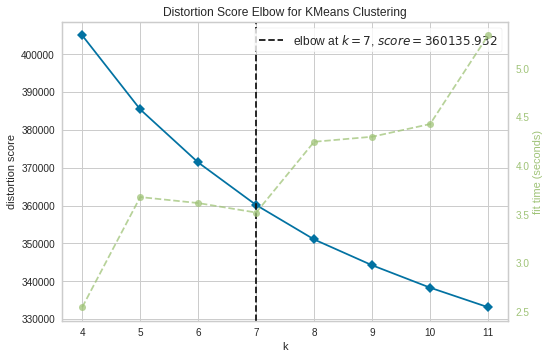

In [51]:
#yellowbrick elbow plot
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(np.array(data_sent['reviewText_lemma_bert'].to_list()))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

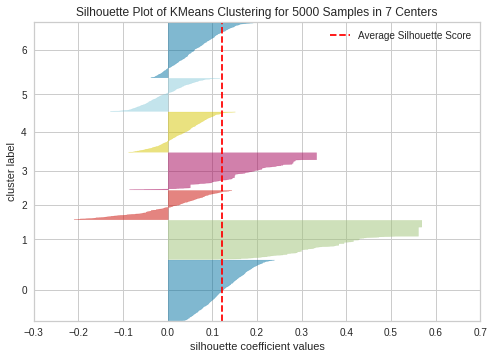

In [53]:
#yellowbrick silhouette plot
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(np.array(data_sent['reviewText_lemma_bert'].to_list()))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

yellowbrick.cluster.icdm.InterclusterDistance

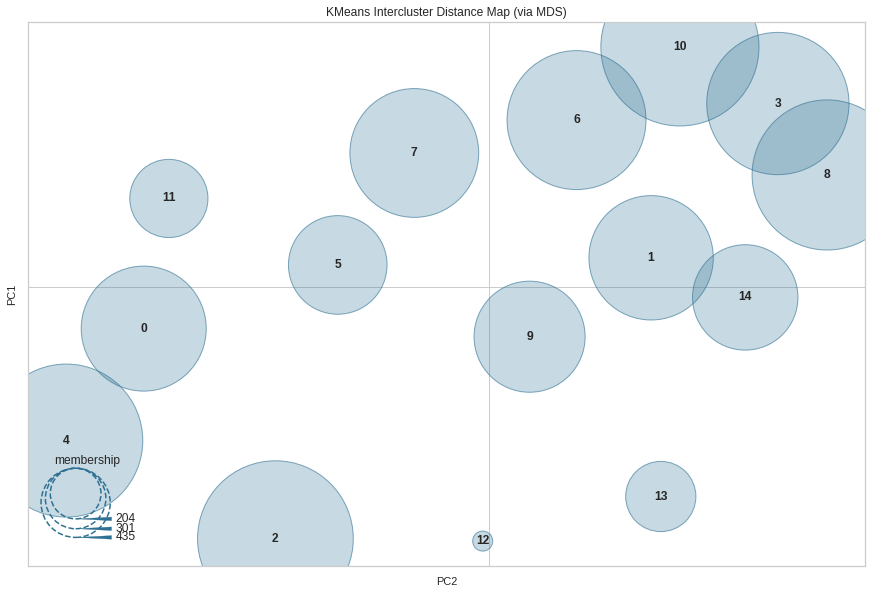

In [54]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance


# Instantiate the clustering model and visualizer
model = KMeans(15)
visualizer = InterclusterDistance(model, size=(1080, 720))
display(type(visualizer))

visualizer.fit(np.array(data_sent['reviewText_lemma_bert'].to_list()))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


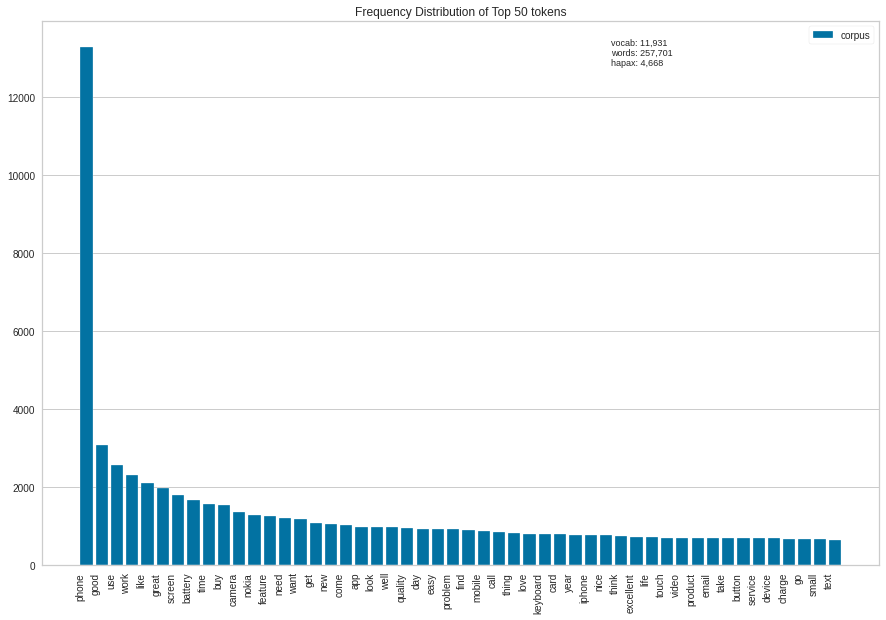

In [55]:
#Token frequency Distribution
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(data_sent['reviewText_lemma'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)
visualizer.show()

scipy.sparse.csr.csr_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


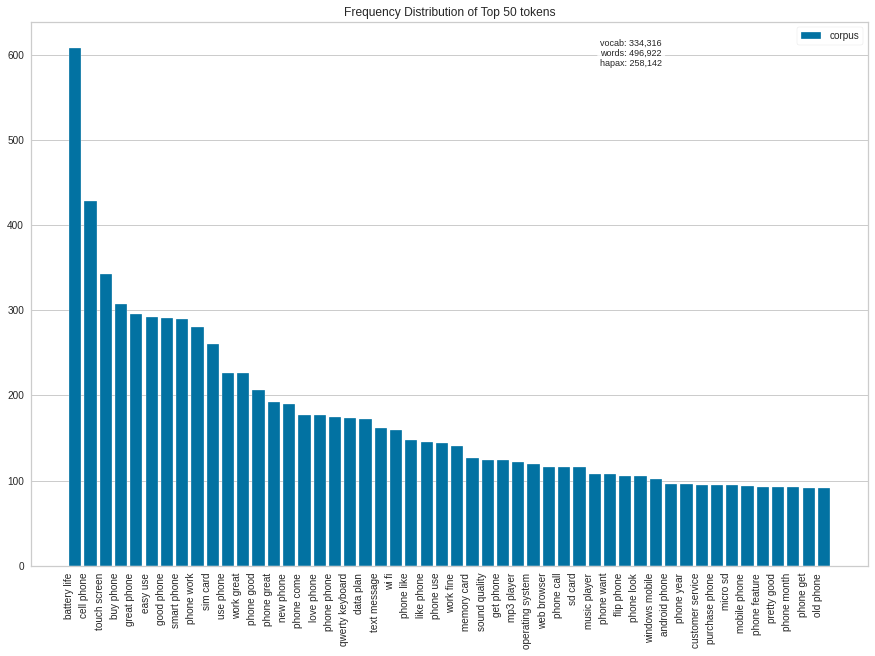

In [56]:
#Token frequency Distribution (attempt at bigrams)
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 

#c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
#ngrams = c_vec.fit_transform(data_core['reviewText_lemma'])
# count frequency of ngrams
#count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
#vocab = c_vec.vocabulary_
#df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
#            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})



vectorizer = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
docs       = vectorizer.fit_transform(data_sent['reviewText_lemma'])
display(type(docs))
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)
visualizer.show()

# General Visualizations

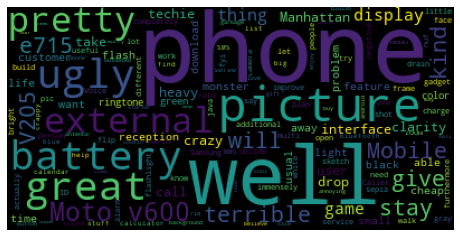

In [57]:
from wordcloud import WordCloud 

text = data_sent['reviewText_lemma'][0:10000].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# BERT original Visualizations

In [ ]:
num_topics = 15
from sklearn.cluster import KMeans
import umap.umap_ as umap
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

def predict_topics_with_kmeans(embeddings,num_topics):
  kmeans_model = KMeans(num_topics)
  kmeans_model.fit(embeddings)
  topics_labels = kmeans_model.predict(embeddings)
  return topics_labels


    
def plot_embeddings(embedding, labels,title):

    labels = np.array( labels )
    distinct_labels =  set( labels )
    
    n = len(embedding)
    counter = Counter(labels)
    for i in range(len( distinct_labels )):
        ratio = (counter[i] / n )* 100
        cluster_label = f"cluster {i}: { round(ratio,2)}"
        x = embedding[:, 0][labels == i]
        y = embedding[:, 1][labels == i]
        plt.plot(x, y, '.', alpha=0.4, label= cluster_label)
    plt.legend(title="Topic",loc = 'upper left', bbox_to_anchor=(1.01,1))
    plt.title(title)
    

def reduce_umap(embedding):
  reducer = umap.UMAP() #umap.UMAP()
  embedding_umap = reducer.fit_transform( embedding  )
  return embedding_umap

def reduce_pca(embedding):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform( embedding )
    print( "pca explained_variance_ ",pca.explained_variance_)
    print( "pca explained_variance_ratio_ ",pca.explained_variance_ratio_)
    
    return reduced

def reduce_tsne(embedding):
    tsne = TSNE(n_components=2)
    reduced = tsne.fit_transform( embedding )
    
    return reduced

In [ ]:
#Apply Kmeans without dimension reduction
labels_bert_raw  = predict_topics_with_kmeans(embedding_bert,num_topics)

In [ ]:
#Apply Kmeans for Bert Vectors  with Umap  dimension reduction

embedding_umap_bert = reduce_umap( embedding_bert )
labels_bert_umap  = predict_topics_with_kmeans(embedding_umap_bert,num_topics)
plot_embeddings(embedding_umap_bert, labels_bert_umap,"Bert with Umap")

In [ ]:
#Apply Kmeans for Bert Vectors  with PCA  dimension reduction

embedding_bert_pca =  reduce_pca( embedding_bert )
labels_bert_pca  = predict_topics_with_kmeans(embedding_bert_pca,num_topics)

plot_embeddings(embedding_bert_pca,labels_bert_pca,"Bert with PCA")

In [ ]:
#Apply Kmeans for Bert Vectors  with T-sne  dimension reduction


embedding_bert_tsne =  reduce_tsne( embedding_bert )
labels_bert_tsne  = predict_topics_with_kmeans(embedding_bert_tsne,num_topics)
plot_embeddings(embedding_bert_tsne,labels_bert_tsne,"Bert with T-sne")


In [ ]:
print("Silhouette score:" )

print("Raw Bert" ,silhouette_score(embedding_bert, labels_bert_raw) )

print("Bert with PCA" ,  silhouette_score(embedding_bert_pca, labels_bert_pca) )

print("Bert with Tsne" , silhouette_score(embedding_bert_tsne, labels_bert_tsne) )


print("Bert with Umap" ,  silhouette_score(embedding_umap_bert , labels_bert_umap ) )